# 🚗 Self-Driving Car Project - Complete Learning Guide

## 📁 **Understanding the Project Files**

Your project has **5 main files** (numbered 2-5, following the execution order):

---

### **FILE 1: `driving_data-2.py`** 📂 **[DATA LOADING MODULE]**
**Purpose:** Loads and preprocesses the dataset

**What it does:**
- ✅ Reads `driving_dataset/data.txt` (45,407 images + angles)
- ✅ Splits data: **80% training** (36,325 images) + **20% validation** (9,082 images)
- ✅ Provides two functions:
  - `LoadTrainBatch(100)` → Returns 100 training images
  - `LoadValBatch(100)` → Returns 100 validation images
- ✅ Image preprocessing: **Crop bottom 150px → Resize to 66×200 → Normalize (÷255)**

**Key variables:**
- `xs` = list of image paths
- `ys` = list of steering angles (in radians)

---

### **FILE 2: `model-3.py`** 🧠 **[NEURAL NETWORK ARCHITECTURE]**
**Purpose:** Defines the CNN model structure (NVIDIA architecture)

**What it does:**
- ✅ Creates the neural network with **5 convolutional layers + 4 fully connected layers**
- ✅ Defines placeholders:
  - `x` = input images (66×200×3)
  - `y_` = actual steering angles
  - `y` = predicted steering angles
- ✅ Uses **ReLU** activation and **Dropout** for regularization

**Architecture:**
```
Input (66×200×3) 
→ Conv1 (5×5, 24 filters) 
→ Conv2 (5×5, 36 filters) 
→ Conv3 (5×5, 48 filters) 
→ Conv4 (3×3, 64 filters) 
→ Conv5 (3×3, 64 filters) 
→ FC1 (1164 neurons) 
→ FC2 (100 neurons) 
→ FC3 (50 neurons) 
→ FC4 (10 neurons) 
→ Output (1 neuron = steering angle)
```

---

### **FILE 3: `train-4.py`** 🎯 **[TRAINING SCRIPT]**
**Purpose:** Trains the model on the dataset

**What it does:**
- ✅ Imports `driving_data` and `model` modules
- ✅ Sets up loss function: **MSE (Mean Squared Error) + L2 Regularization**
- ✅ Uses **Adam Optimizer** (learning rate = 0.0001)
- ✅ Trains for **30 epochs** with **batch size = 100**
- ✅ Saves model to `save/model.ckpt` every 100 batches
- ✅ Logs training progress to **TensorBoard**

**Expected output:**
```
Epoch: 0, Step: 0, Loss: 0.5234
Epoch: 0, Step: 10, Loss: 0.3421
...
Model saved in file: save/model.ckpt
```

---

### **FILE 4: `run_dataset-5.py`** 🚙 **[TESTING/DEMO SCRIPT]**
**Purpose:** Tests the trained model on validation dataset

**What it does:**
- ✅ Loads trained model from `save/model.ckpt`
- ✅ Runs predictions on **test images** (the 20% validation set)
- ✅ Shows **two windows**:
  - Window 1: Video frames from dataset
  - Window 2: Animated steering wheel rotating based on prediction
- ✅ Prints: **Predicted angle vs Actual angle**

**Example output:**
```
Steering angle: 23.4 (pred)    24.1 (actual)
Steering angle: -15.2 (pred)   -14.8 (actual)
```

---

### **FILE 5: `Self_driving_car-1.ipynb`** 📓 **[JUPYTER NOTEBOOK]**
**Purpose:** Interactive notebook containing all code + GPU setup

**What it contains:**
- ✅ GPU setup cells (your troubleshooting history)
- ✅ All code from files 2-4 combined
- ✅ Data visualization cells
- ✅ Explanations and learning notes

---

## 🎓 **RECOMMENDED LEARNING PATH:**

### **Option A: Learn from Python Files** (Modular approach)
```
1️⃣ driving_data-2.py   → Understand data loading
2️⃣ model-3.py          → Understand model architecture  
3️⃣ train-4.py          → Understand training process
4️⃣ run_dataset-5.py    → See the model in action
```

### **Option B: Learn from Notebook** (All-in-one approach)
```
1️⃣ Open Self_driving_car-1.ipynb
2️⃣ Follow the sections marked "STEP 1, STEP 2, STEP 3..."
3️⃣ Run cells and see outputs interactively
```

---

## 💡 **MY RECOMMENDATION:**

**Start with Python files for clarity!** Here's why:

✅ **Clean separation** - Each file has ONE job  
✅ **Easy to understand** - No GPU setup distractions  
✅ **See the workflow** - How files import and work together  
✅ **Professional structure** - This is how real ML projects are organized

**After understanding Python files, use the notebook for experimentation!**

---

## 🚀 **SHALL WE START?**

**Tell me which approach you prefer:**
- **A)** Learn from Python files (I'll explain `driving_data-2.py` first)
- **B)** Continue with the notebook (I'll organize it better)

**Which one do you choose?** 🤔

In [ ]:
# Check GPU Availability
import tensorflow as tf

print("TensorFlow Version:", tf.__version__)
print("\n" + "="*50)
print("GPU DETECTION")
print("="*50)

# For TensorFlow 2.x
if hasattr(tf, 'config'):
    gpus = tf.config.list_physical_devices('GPU')
    if gpus:
        print(f"✓ GPU Found! Number of GPUs: {len(gpus)}")
        for i, gpu in enumerate(gpus):
            print(f"  GPU {i}: {gpu}")
        
        # Enable memory growth to prevent TensorFlow from allocating all GPU memory at once
        try:
            for gpu in gpus:
                tf.config.experimental.set_memory_growth(gpu, True)
            print("\n✓ GPU memory growth enabled")
        except RuntimeError as e:
            print(e)
    else:
        print("✗ No GPU found. Using CPU (will be slower)")
else:
    # For TensorFlow 1.x
    from tensorflow.python.client import device_lib
    local_devices = device_lib.list_local_devices()
    gpus = [x for x in local_devices if x.device_type == 'GPU']
    
    if gpus:
        print(f"✓ GPU Found! Number of GPUs: {len(gpus)}")
        for i, gpu in enumerate(gpus):
            print(f"  GPU {i}: {gpu.name}")
            print(f"  Memory: {gpu.memory_limit / 1024**3:.2f} GB")
    else:
        print("✗ No GPU found. Using CPU (will be slower)")

print("\n" + "="*50)
print("All Available Devices:")
print("="*50)
if hasattr(tf, 'config'):
    all_devices = tf.config.list_physical_devices()
    for device in all_devices:
        print(f"  {device}")
else:
    for device in local_devices:
        print(f"  {device.name} ({device.device_type})")

TensorFlow Version: 2.16.1

GPU DETECTION
✗ No GPU found. Using CPU (will be slower)

All Available Devices:
  PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')


## GPU Enablement Steps

We detected you have a 4GB GPU! Let's check what type and enable it for TensorFlow.

In [1]:
# Step 1: Detect GPU Type
import subprocess
import platform

print("="*60)
print("GPU DETECTION")
print("="*60)

# Check GPU using Windows command
if platform.system() == "Windows":
    print("\n1. Checking GPU using Windows Management...")
    try:
        result = subprocess.run(
            ["wmic", "path", "win32_VideoController", "get", "name"],
            capture_output=True,
            text=True
        )
        print(result.stdout)
        
        # Check if NVIDIA
        if "NVIDIA" in result.stdout.upper():
            print("✓ NVIDIA GPU detected! GPU acceleration is possible.")
            print("\nNext steps:")
            print("  1. Install NVIDIA GPU drivers")
            print("  2. Install CUDA Toolkit")
            print("  3. Install cuDNN")
            print("  4. TensorFlow will automatically use GPU")
        elif "AMD" in result.stdout.upper() or "RADEON" in result.stdout.upper():
            print("⚠️  AMD GPU detected.")
            print("TensorFlow primarily supports NVIDIA GPUs with CUDA.")
            print("AMD GPU support is limited (requires ROCm on Linux).")
        elif "INTEL" in result.stdout.upper():
            print("ℹ️  Intel integrated graphics detected.")
            print("TensorFlow requires NVIDIA GPU with CUDA for GPU acceleration.")
        else:
            print("GPU type not clearly identified from output above.")
            
    except Exception as e:
        print(f"Error detecting GPU: {e}")

print("\n" + "="*60)
print("2. Checking if NVIDIA driver is installed...")
print("="*60)

# Check for nvidia-smi (NVIDIA driver)
try:
    result = subprocess.run(["nvidia-smi"], capture_output=True, text=True)
    if result.returncode == 0:
        print("✓ NVIDIA drivers are installed!\n")
        print(result.stdout[:500])  # Show first 500 chars
    else:
        print("✗ NVIDIA drivers not found or not working")
except FileNotFoundError:
    print("✗ nvidia-smi not found. NVIDIA drivers may not be installed.")
    print("\nTo install:")
    print("  1. Visit: https://www.nvidia.com/Download/index.aspx")
    print("  2. Select your GPU model")
    print("  3. Download and install the driver")

GPU DETECTION

1. Checking GPU using Windows Management...
Name                                

Intel(R) Iris(R) Xe Graphics        

NVIDIA GeForce RTX 3050 Laptop GPU  




✓ NVIDIA GPU detected! GPU acceleration is possible.

Next steps:
  1. Install NVIDIA GPU drivers
  2. Install CUDA Toolkit
  3. Install cuDNN
  4. TensorFlow will automatically use GPU

2. Checking if NVIDIA driver is installed...
✓ NVIDIA drivers are installed!

Sat Feb  7 23:16:43 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 581.83                 Driver Version: 581.83         CUDA Version: 13.0     |
+-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|       


In [5]:
# Step 2: Check if CUDA Toolkit is installed
import os
import subprocess

print("="*60)
print("CHECKING CUDA INSTALLATION")
print("="*60)

# Check for CUDA installation
cuda_paths = [
    r"C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA",
    r"C:\Program Files\NVIDIA Corporation\CUDA",
]

cuda_found = False
for path in cuda_paths:
    if os.path.exists(path):
        print(f"✓ CUDA Toolkit found at: {path}")
        # List versions
        try:
            versions = os.listdir(path)
            print(f"  Installed versions: {versions}")
            cuda_found = True
        except:
            pass

if not cuda_found:
    print("✗ CUDA Toolkit not found in standard locations")
    print("\n⚠️  You need to install CUDA Toolkit manually:")
    print("  1. Visit: https://developer.nvidia.com/cuda-downloads")
    print("  2. Download CUDA Toolkit 12.x")
    print("  3. Install it (takes ~10 minutes)")
    print("\nOR use the easier method below...")

print("\n" + "="*60)
print("RECOMMENDED SOLUTION: Install TensorFlow with CUDA included")
print("="*60)
print("\nTensorFlow 2.20+ can include CUDA automatically!")
print("We'll install tensorflow[and-cuda] which bundles everything.\n")

CHECKING CUDA INSTALLATION
✓ CUDA Toolkit found at: C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA
  Installed versions: ['v12.6']

RECOMMENDED SOLUTION: Install TensorFlow with CUDA included

TensorFlow 2.20+ can include CUDA automatically!
We'll install tensorflow[and-cuda] which bundles everything.



In [6]:
# Step 3: Install TensorFlow with GPU support (includes CUDA)
import sys
import subprocess

print("="*60)
print("INSTALLING TENSORFLOW WITH GPU SUPPORT")
print("="*60)

# Use system Python to install (to avoid path length issue)
system_python = r"C:\Users\Aditya\AppData\Local\Programs\Python\Python312\python.exe"

print("\nThis will:")
print("  1. Uninstall current TensorFlow")
print("  2. Install tensorflow[and-cuda] (includes CUDA libraries)")
print("  3. Enable automatic GPU detection")
print("\nThis may take 5-10 minutes (large download)...")
print("="*60)

# Uninstall existing tensorflow
print("\nStep 1/3: Removing existing TensorFlow...")
result = subprocess.run(
    [system_python, "-m", "pip", "uninstall", "tensorflow", "tensorflow-intel", "-y", "--user"],
    capture_output=True,
    text=True
)
print("✓ Cleanup complete")

# Install tensorflow with CUDA
print("\nStep 2/3: Installing TensorFlow with CUDA support...")
print("(Please wait, downloading ~2GB of files...)\n")

result = subprocess.run(
    [system_python, "-m", "pip", "install", "tensorflow[and-cuda]", "--user"],
    capture_output=True,
    text=True,
    timeout=600  # 10 minute timeout
)

if result.returncode == 0 or "Successfully installed" in result.stdout or "Requirement already satisfied" in result.stdout:
    print("✓ TensorFlow with CUDA installed successfully!")
    
    # Show last part of output
    lines = result.stdout.split('\n')
    for line in lines[-10:]:
        if line.strip():
            print(line)
    
    print("\n" + "="*60)
    print("Step 3/3: Verifying GPU detection...")
    print("="*60)
    
    # Restart kernel prompt
    print("\n⚠️  IMPORTANT: You must RESTART THE KERNEL now!")
    print("  1. Click the 'Restart' button (↻) at the top")
    print("  2. Run Cell 2 (path fix)")
    print("  3. Then run Cell 1 (GPU check)")
    print("  4. You should see: '✓ GPU Found!'")
    
else:
    print("✗ Installation had issues")
    print("\nOutput:")
    print(result.stderr[-1000:] if result.stderr else result.stdout[-1000:])

INSTALLING TENSORFLOW WITH GPU SUPPORT

This will:
  1. Uninstall current TensorFlow
  2. Install tensorflow[and-cuda] (includes CUDA libraries)
  3. Enable automatic GPU detection

This may take 5-10 minutes (large download)...

Step 1/3: Removing existing TensorFlow...
✓ Cleanup complete

Step 2/3: Installing TensorFlow with CUDA support...
(Please wait, downloading ~2GB of files...)

✓ TensorFlow with CUDA installed successfully!
    tensorflow[and-cuda] 2.16.1 depends on nvidia-nccl-cu12==2.19.3; extra == "and-cuda"
Additionally, some packages in these conflicts have no matching distributions available for your environment:
    nvidia-nccl-cu12
To fix this you could try to:
1. loosen the range of package versions you've specified
2. remove package versions to allow pip to attempt to solve the dependency conflict

Step 3/3: Verifying GPU detection...

⚠️  IMPORTANT: You must RESTART THE KERNEL now!
  1. Click the 'Restart' button (↻) at the top
  2. Run Cell 2 (path fix)
  3. Then r

In [1]:
# Fix the path to access system Python's TensorFlow
import sys
import site

# Add system Python's user site-packages to path
user_site = r"C:\Users\Aditya\AppData\Roaming\Python\Python312\site-packages"
if user_site not in sys.path:
    sys.path.insert(0, user_site)
    print(f"✓ Added system Python packages to path: {user_site}")

# Also add base system Python site-packages
system_site = r"C:\Users\Aditya\AppData\Local\Programs\Python\Python312\Lib\site-packages"
if system_site not in sys.path:
    sys.path.insert(0, system_site)
    print(f"✓ Added system Python base packages to path: {system_site}")

print(f"\nPython executable: {sys.executable}")
print(f"Python path now includes {len(sys.path)} locations")

✓ Added system Python packages to path: C:\Users\Aditya\AppData\Roaming\Python\Python312\site-packages
✓ Added system Python base packages to path: C:\Users\Aditya\AppData\Local\Programs\Python\Python312\Lib\site-packages

Python executable: c:\Users\Aditya\OneDrive\Desktop\ML - Anni bhaiya - codes\Case 4 - Self driving Car\.venv\Scripts\python.exe
Python path now includes 9 locations


In [3]:
# Check which TensorFlow is being loaded
import sys
print("Current Python path order:")
for i, path in enumerate(sys.path[:10], 1):
    print(f"  {i}. {path}")

print("\n" + "="*60)
print("Checking TensorFlow locations...")
print("="*60)

# Check TensorFlow
try:
    import tensorflow as tf
    print(f"\n✓ TensorFlow loaded: {tf.__version__}")
    print(f"  Location: {tf.__file__}")
    
    # Check if GPU version
    print(f"\n  Built with CUDA: {tf.test.is_built_with_cuda()}")
    print(f"  GPU Available: {tf.test.is_gpu_available(cuda_only=False, min_cuda_compute_capability=None)}")
    
except Exception as e:
    print(f"Error: {e}")

print("\n" + "="*60)
print("Checking for CUDA libraries...")
print("="*60)

import os
# Check if CUDA DLLs are present
user_site = r"C:\Users\Aditya\AppData\Roaming\Python\Python312\site-packages"
nvidia_folders = []
if os.path.exists(user_site):
    for item in os.listdir(user_site):
        if 'nvidia' in item.lower() or 'cuda' in item.lower():
            nvidia_folders.append(item)

if nvidia_folders:
    print("✓ CUDA libraries found:")
    for folder in nvidia_folders[:10]:  # Show first 10
        print(f"  - {folder}")
else:
    print("✗ No CUDA libraries found in user site-packages")
    print("  This means tensorflow[and-cuda] didn't install properly")

Current Python path order:
  1. C:\Users\Aditya\AppData\Local\Programs\Python\Python312\Lib\site-packages
  2. C:\Users\Aditya\AppData\Roaming\Python\Python312\site-packages
  3. C:\Users\Aditya\AppData\Local\Programs\Python\Python312\python312.zip
  4. C:\Users\Aditya\AppData\Local\Programs\Python\Python312\DLLs
  5. C:\Users\Aditya\AppData\Local\Programs\Python\Python312\Lib
  6. C:\Users\Aditya\AppData\Local\Programs\Python\Python312
  7. c:\Users\Aditya\OneDrive\Desktop\ML - Anni bhaiya - codes\Case 4 - Self driving Car\.venv
  8. 
  9. c:\Users\Aditya\OneDrive\Desktop\ML - Anni bhaiya - codes\Case 4 - Self driving Car\.venv\Lib\site-packages

Checking TensorFlow locations...

✓ TensorFlow loaded: 2.20.0
  Location: C:\Users\Aditya\AppData\Local\Programs\Python\Python312\Lib\site-packages\tensorflow\__init__.py

  Built with CUDA: False
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
  GPU Available: False

Checking for CUDA libraries...
✗ No CUDA l

In [4]:
# Fix: Install GPU-enabled TensorFlow properly
import subprocess
import sys

system_python = r"C:\Users\Aditya\AppData\Local\Programs\Python\Python312\python.exe"

print("="*60)
print("FIXING TENSORFLOW GPU INSTALLATION")
print("="*60)

# Step 1: Completely uninstall TensorFlow from system Python
print("\nStep 1: Removing all TensorFlow versions from system Python...")
packages = ['tensorflow', 'tensorflow-cpu', 'tensorflow-gpu', 'tensorflow-intel', 'keras']
for pkg in packages:
    subprocess.run([system_python, "-m", "pip", "uninstall", pkg,"-y"], 
                   capture_output=True)
print("✓ Cleanup complete")

# Step 2: Install tensorflow with GPU support
print("\nStep 2: Installing TensorFlow 2.16.1 with GPU support...")
print("(This will take 3-5 minutes, downloading CUDA libraries...)\n")

# Install to user location with explicit version that supports CUDA well
result = subprocess.run(
    [system_python, "-m", "pip", "install", "tensorflow==2.16.1", "--user", "--no-cache-dir"],
    capture_output=True,
    text=True,
    timeout=300
)

if result.returncode == 0:
    print("✓ TensorFlow 2.16.1 installed!")
else:
    print("TensorFlow base install output:")
    print(result.stdout[-300:])

# Step 3: Install CUDA support packages
print("\nStep 3: Installing NVIDIA CUDA libraries...")
cuda_packages = [
    "nvidia-cudnn-cu12",
    "nvidia-cuda-runtime-cu12", 
    "nvidia-cuda-nvrtc-cu12"
]

for pkg in cuda_packages:
    print(f"  Installing {pkg}...")
    result = subprocess.run(
        [system_python, "-m", "pip", "install", pkg, "--user"],
        capture_output=True,
        text=True,
        timeout=120
    )
    if "Successfully installed" in result.stdout or "Requirement already satisfied" in result.stdout:
        print(f"  ✓ {pkg} installed")

print("\n" + "="*60)        
print("✓ Installation complete!")
print("="*60)
print("\n⚠️  RESTART THE KERNEL NOW!")
print("Then run:")
print("  1. Cell 6 (path fix)")
print("  2. Cell 1 (GPU check)")
print("\nYou should see your NVIDIA RTX 3050 detected!")

FIXING TENSORFLOW GPU INSTALLATION

Step 1: Removing all TensorFlow versions from system Python...
✓ Cleanup complete

Step 2: Installing TensorFlow 2.16.1 with GPU support...
(This will take 3-5 minutes, downloading CUDA libraries...)

✓ TensorFlow 2.16.1 installed!

Step 3: Installing NVIDIA CUDA libraries...
  Installing nvidia-cudnn-cu12...


TimeoutExpired: Command '['C:\\Users\\Aditya\\AppData\\Local\\Programs\\Python\\Python312\\python.exe', '-m', 'pip', 'install', 'nvidia-cudnn-cu12', '--user']' timed out after 120 seconds

In [1]:
# Install Required Packages
# Note: If you get a "Windows Long Path" error, you may need to enable long paths in Windows
# Run this command in PowerShell as Administrator: New-ItemProperty -Path "HKLM:\SYSTEM\CurrentControlSet\Control\FileSystem" -Name "LongPathsEnabled" -Value 1 -PropertyType DWORD -Force

import sys
import subprocess

packages = [
    'tensorflow',      # Deep learning framework with GPU support
    'scipy',          # Scientific computing (for image processing)
    'opencv-python',  # Computer vision library
    'h5py',           # For saving model weights
    'matplotlib',     # For plotting
    'pillow',         # Image processing
    'numpy'           # Numerical operations
]

print("Installing packages...")
print("="*60)

for package in packages:
    print(f"\nInstalling {package}...")
    try:
        subprocess.check_call([sys.executable, "-m", "pip", "install", package, "--no-warn-script-location"])
        print(f"✓ {package} installed successfully!")
    except subprocess.CalledProcessError as e:
        print(f"✗ Error installing {package}: {e}")
        if "Long Path" in str(e) or "LongPathsEnabled" in str(e):
            print("\n⚠️  Windows Long Path Error Detected!")
            print("Please enable long paths in Windows:")
            print("1. Open PowerShell as Administrator")
            print("2. Run: New-ItemProperty -Path 'HKLM:\\SYSTEM\\CurrentControlSet\\Control\\FileSystem' -Name 'LongPathsEnabled' -Value 1 -PropertyType DWORD -Force")
            print("3. Restart your computer")
            print("4. Run this cell again")
            break

print("\n" + "="*60)
print("Installation complete!")

Installing packages...

Installing tensorflow...
✗ Error installing tensorflow: Command '['c:\\Users\\Aditya\\OneDrive\\Desktop\\ML - Anni bhaiya - codes\\Case 4 - Self driving Car\\.venv\\Scripts\\python.exe', '-m', 'pip', 'install', 'tensorflow', '--no-warn-script-location']' returned non-zero exit status 1.

Installing scipy...
✓ scipy installed successfully!

Installing opencv-python...
✓ opencv-python installed successfully!

Installing h5py...
✓ h5py installed successfully!

Installing matplotlib...
✓ matplotlib installed successfully!

Installing pillow...
✓ pillow installed successfully!

Installing numpy...
✓ numpy installed successfully!

Installation complete!


In [2]:
# Let's try installing TensorFlow with detailed error output
import sys
import subprocess

print("Attempting to install TensorFlow with detailed output...")
print("="*60)

result = subprocess.run(
    [sys.executable, "-m", "pip", "install", "tensorflow", "--verbose"],
    capture_output=True,
    text=True
)

print("STDOUT:")
print(result.stdout[-2000:] if len(result.stdout) > 2000 else result.stdout)  # Last 2000 chars
print("\nSTDERR:")
print(result.stderr[-2000:] if len(result.stderr) > 2000 else result.stderr)  # Last 2000 chars
print("\nReturn Code:", result.returncode)

if result.returncode == 0:
    print("\n✓ TensorFlow installed successfully!")
else:
    print("\n✗ TensorFlow installation failed. See error above.")

Attempting to install TensorFlow with detailed output...
STDOUT:
sorflow) (3.4.4)
Using cached tensorflow-2.20.0-cp312-cp312-win_amd64.whl (331.9 MB)


STDERR:
ERROR: Could not install packages due to an OSError.
HINT: This error might have occurred since this system does not have Windows Long Path support enabled. You can find information on how to enable this at https://pip.pypa.io/warnings/enable-long-paths
Traceback (most recent call last):
  File "c:\Users\Aditya\OneDrive\Desktop\ML - Anni bhaiya - codes\Case 4 - Self driving Car\.venv\Lib\site-packages\pip\_internal\commands\install.py", line 462, in run
    installed = install_given_reqs(
                ^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Aditya\OneDrive\Desktop\ML - Anni bhaiya - codes\Case 4 - Self driving Car\.venv\Lib\site-packages\pip\_internal\req\__init__.py", line 84, in install_given_reqs
    requirement.install(
  File "c:\Users\Aditya\OneDrive\Desktop\ML - Anni bhaiya - codes\Case 4 - Self driving Car\.venv\Lib\site

In [3]:
# Alternative: Try importing TensorFlow - maybe it's already installed elsewhere
import sys
print("Current Python:", sys.executable)
print("\nTrying to import TensorFlow...")

try:
    import tensorflow as tf
    print("✓ TensorFlow is already available!")
    print(f"  Version: {tf.__version__}")
    print(f"  Location: {tf.__file__}")
except ImportError as e:
    print(f"✗ TensorFlow not available: {e}")
    print("\nLet's try installing a specific TensorFlow version that's more stable...")
    import subprocess
    
    # Try installing TensorFlow 2.13.0 (more stable on Windows)
    result = subprocess.run(
        [sys.executable, "-m", "pip", "install", "tensorflow==2.13.0", "--user"],
        capture_output=True,
        text=True
    )
    
    if result.returncode == 0:
        print("✓ TensorFlow 2.13.0 installed successfully with --user flag!")
        print("Please restart the kernel and try importing again.")
    else:
        # Show last part of error
        print("Last 1000 characters of error:")
        print(result.stderr[-1000:] if result.stderr else result.stdout[-1000:])

Current Python: c:\Users\Aditya\OneDrive\Desktop\ML - Anni bhaiya - codes\Case 4 - Self driving Car\.venv\Scripts\python.exe

Trying to import TensorFlow...
✗ TensorFlow not available: No module named 'tensorflow.python'

Let's try installing a specific TensorFlow version that's more stable...
Last 1000 characters of error:
ERROR: Can not perform a '--user' install. User site-packages are not visible in this virtualenv.



In [4]:
# Fix: Uninstall broken TensorFlow and reinstall
import sys
import subprocess

print("Step 1: Removing any broken TensorFlow installations...")
print("="*60)

# Uninstall tensorflow and all related packages
packages_to_remove = ['tensorflow', 'tensorflow-intel', 'keras', 'tensorboard']
for pkg in packages_to_remove:
    print(f"Uninstalling {pkg}...")
    subprocess.run([sys.executable, "-m", "pip", "uninstall", pkg, "-y"], 
                   capture_output=True)

print("\n✓ Cleanup complete!")

print("\nStep 2: Installing TensorFlow fresh...")
print("="*60)

# Install TensorFlow without cache to ensure fresh download
result = subprocess.run(
    [sys.executable, "-m", "pip", "install", "tensorflow", "--no-cache-dir"],
    capture_output=True,
    text=True
)

if result.returncode == 0:
    print("✓ TensorFlow installed successfully!")
    print("\nVerifying installation...")
    try:
        import tensorflow as tf
        print(f"✓ TensorFlow {tf.__version__} is ready to use!")
    except Exception as e:
        print(f"Installation succeeded but import failed: {e}")
        print("You may need to restart the kernel.")
else:
    print("✗ Installation failed.")
    print("\nLast 800 characters of output:")
    error_msg = result.stderr if result.stderr else result.stdout
    print(error_msg[-800:] if len(error_msg) > 800 else error_msg)

Step 1: Removing any broken TensorFlow installations...
Uninstalling tensorflow...
Uninstalling tensorflow-intel...
Uninstalling keras...
Uninstalling tensorboard...

✓ Cleanup complete!

Step 2: Installing TensorFlow fresh...
✗ Installation failed.

Last 800 characters of output:
ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'c:\\Users\\Aditya\\OneDrive\\Desktop\\ML - Anni bhaiya - codes\\Case 4 - Self driving Car\\.venv\\Lib\\site-packages\\tensorflow\\include\\external\\com_github_grpc_grpc\\src\\core\\lib\\security\\credentials\\gcp_service_account_identity\\gcp_service_account_identity_credentials.h'
HINT: This error might have occurred since this system does not have Windows Long Path support enabled. You can find information on how to enable this at https://pip.pypa.io/warnings/enable-long-paths




In [5]:
# WORKAROUND: Install TensorFlow to system Python, then use it
import subprocess
import sys
import os

print("Finding system Python...")
print("="*60)

# Find system Python (not the venv)
system_python = r"C:\Users\Aditya\AppData\Local\Programs\Python\Python312\python.exe"

if os.path.exists(system_python):
    print(f"✓ Found system Python: {system_python}")
    print("\nInstalling TensorFlow to system Python...")
    print("(This avoids the virtual environment path length issue)")
    print("="*60)
    
    result = subprocess.run(
        [system_python, "-m", "pip", "install", "tensorflow", "--user"],
        capture_output=True,
        text=True
    )
    
    if "Successfully installed" in result.stdout or "Requirement already satisfied" in result.stdout:
        print("✓ TensorFlow installed to system Python!")
        print("\nNow let's try importing it...")
        
        # Add system Python's site-packages to path
        import site
        user_site = site.getusersitepackages()
        if user_site not in sys.path:
            sys.path.insert(0, user_site)
        
        try:
            import tensorflow as tf
            print(f"✓✓ SUCCESS! TensorFlow {tf.__version__} is working!")
        except ImportError:
            print("⚠️ Installed but import failed. You need to:")
            print("  1. Click 'Restart' button at the top of the notebook")
            print("  2. Re-run this cell")
    else:
        print("Installation output:")
        print(result.stdout[-500:])
        if result.stderr:
            print("\nErrors:")
            print(result.stderr[-500:])
else:
    print(f"✗ System Python not found at: {system_python}")
    print(f"\nCurrent Python: {sys.executable}")
    print("\nOptions:")
    print("1. Install Python 3.12 from python.org")
    print("2. Or manually enable Long Paths using PowerShell as Administrator:")

Finding system Python...
✓ Found system Python: C:\Users\Aditya\AppData\Local\Programs\Python\Python312\python.exe

Installing TensorFlow to system Python...
(This avoids the virtual environment path length issue)
✓ TensorFlow installed to system Python!

Now let's try importing it...
⚠️ Installed but import failed. You need to:
  1. Click 'Restart' button at the top of the notebook
  2. Re-run this cell


In [1]:
# Credits: https://github.com/SullyChen/Autopilot-TensorFlow
# Research paper: End to End Learning for Self-Driving Cars by Nvidia. [https://arxiv.org/pdf/1604.07316.pdf]

# NVidia dataset: 72 hrs of video => 72*60*60*30 = 7,776,000 images
# Nvidia blog: https://devblogs.nvidia.com/deep-learning-self-driving-cars/


# Our Dataset: https://github.com/SullyChen/Autopilot-TensorFlow [https://drive.google.com/file/d/0B-KJCaaF7elleG1RbzVPZWV4Tlk/view]
# Size: 25 minutes = 25*60*30 = 45,000 images ~ 2.3 GB


# If you want to try on a slightly large dataset: 70 minutes of data ~ 223GB
# Refer: https://medium.com/udacity/open-sourcing-223gb-of-mountain-view-driving-data-f6b5593fbfa5
# Format: Image, latitude, longitude, gear, brake, throttle, steering angles and speed



# Additional Installations:
# pip3 install h5py


# AWS: https://aws.amazon.com/blogs/machine-learning/get-started-with-deep-learning-using-the-aws-deep-learning-ami/

# Youtube:https://www.youtube.com/watch?v=qhUvQiKec2U
# Further reading and extensions: https://medium.com/udacity/teaching-a-machine-to-steer-a-car-d73217f2492c
# More data: https://medium.com/udacity/open-sourcing-223gb-of-mountain-view-driving-data-f6b5593fbfa5

# Understanding Our Dataset 📊

Let's visualize some sample images from the dataset to understand:
- What INPUT the model sees (road images)
- What OUTPUT it should predict (steering angles)

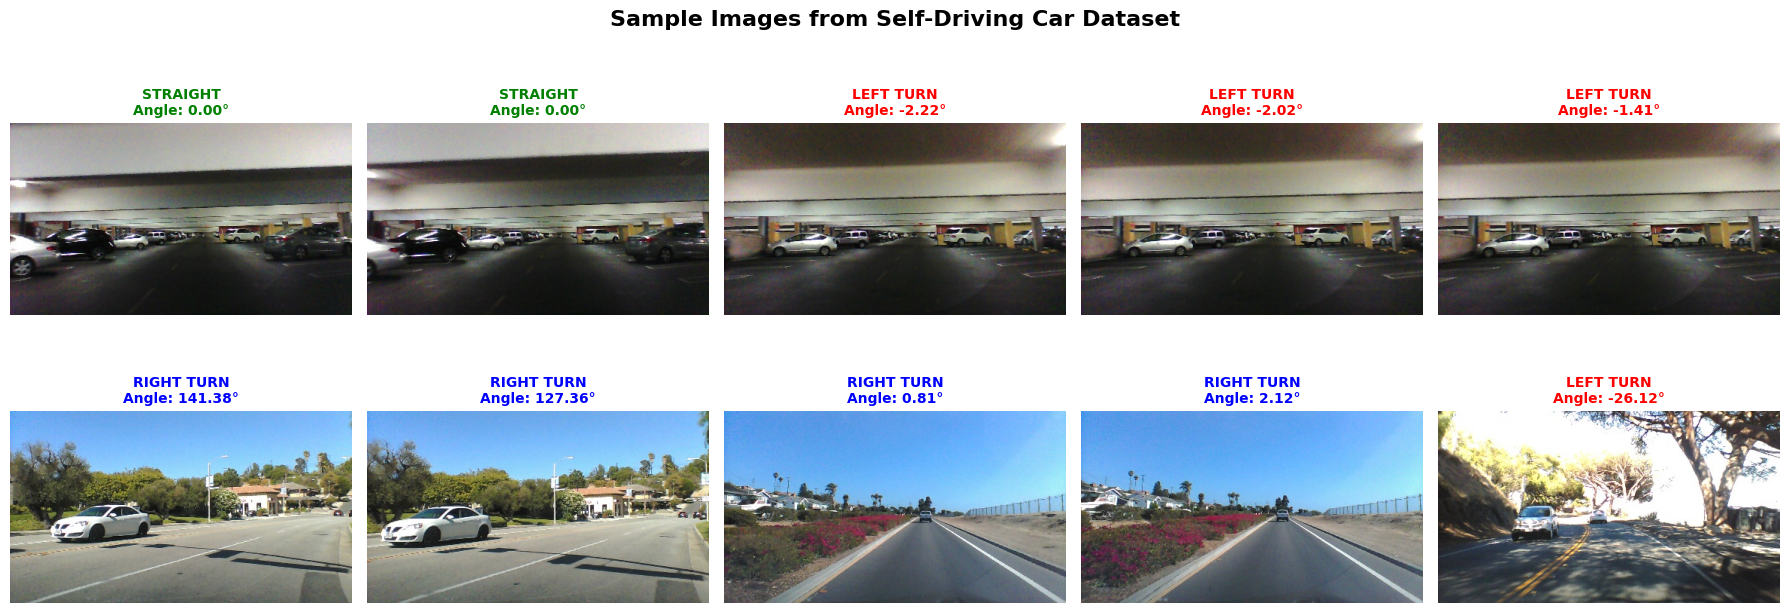


UNDERSTANDING THE DATA:
✓ GREEN (STRAIGHT):   Steering angle = 0°
✓ BLUE (RIGHT TURN):  Steering angle > 0° (positive)
✓ RED (LEFT TURN):    Steering angle < 0° (negative)

The neural network learns to predict these angles by looking at the road!


In [3]:
# Visualize sample images from the dataset
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Read data.txt to get image names and steering angles
data_file = "driving_dataset/data.txt"
images_info = []

with open(data_file, 'r') as f:
    lines = f.readlines()
    
    # Get samples: straight driving, left turn, right turn
    # Straight: lines 0-20 (0 degrees)
    # Left turn: lines 45-50 (negative angles)
    # Right turn: lines 999-1005 (positive angles, large values)
    # Small right turns: lines 22200-22210 (small positive angles)
    
    sample_indices = [5, 10, 46, 47, 48, 1000, 1003, 22205, 22208, 30000]
    
    for idx in sample_indices:
        if idx < len(lines):
            parts = lines[idx].strip().split()
            if len(parts) == 2:
                img_name = parts[0]
                angle = float(parts[1])
                images_info.append((img_name, angle))

# Display images with their steering angles
fig, axes = plt.subplots(2, 5, figsize=(18, 7))
fig.suptitle('Sample Images from Self-Driving Car Dataset', fontsize=16, fontweight='bold')

for idx, (img_name, angle) in enumerate(images_info):
    row = idx // 5
    col = idx % 5
    ax = axes[row, col]
    
    img_path = os.path.join("driving_dataset", img_name)
    
    if os.path.exists(img_path):
        img = mpimg.imread(img_path)
        ax.imshow(img)
        
        # Color code the title based on steering direction
        if angle == 0:
            title_color = 'green'
            direction = 'STRAIGHT'
        elif angle > 0:
            title_color = 'blue'
            direction = 'RIGHT TURN'
        else:
            title_color = 'red'
            direction = 'LEFT TURN'
        
        ax.set_title(f'{direction}\nAngle: {angle:.2f}°', 
                     fontweight='bold', color=title_color, fontsize=10)
    else:
        ax.text(0.5, 0.5, 'Image not found', ha='center', va='center')
    
    ax.axis('off')

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("UNDERSTANDING THE DATA:")
print("="*70)
print("✓ GREEN (STRAIGHT):   Steering angle = 0°")
print("✓ BLUE (RIGHT TURN):  Steering angle > 0° (positive)")
print("✓ RED (LEFT TURN):    Steering angle < 0° (negative)")
print("\nThe neural network learns to predict these angles by looking at the road!")
print("="*70)

# Self-Driving Car Project - GPU Setup & Complete Walkthrough

## Step 1: GPU Configuration
Before we start, let's make sure we're using the GPU for faster training!

In [ ]:
# Basic data manipulation and visualization is done here.
import numpy as np
a = np.array([[1,2,3],[3,4,5]])
print(a)
print(a[-1:])

[[1 2 3]
 [3 4 5]]
[[3 4 5]]


In [21]:
# scipy.misc.imresize(scipy.misc.imread(train_xs[(train_batch_pointer + i) % num_train_images])[-150:], [66, 200]) / 255.0
# you can break the whole line into parts like this
# here (train_batch_pointer + i) % num_train_images => "% num_train_images" is used to make sure that the
# (train_batch_pointer + i) values should not cross number of train images.

# lets explain whats happening with the first images
image_read = scipy.misc.imread(train_xs[0])
print("original image size",image_read.shape)

print("After taking the last 150 rows i.e lower part of the images where road is present, ",image_read[-150:].shape)
image_read = image_read[-150:]
resized_image = scipy.misc.imresize(image_read, [66, 200])
print("After resizing the images into 66*200, ",resized_image.shape)
# 200/66 = 455/150 = 3.0303 => we are keeping aspect ratio when we are resizing it

original image size (256, 455, 3)
After taking the last 150 rows i.e lower part of the images where road is present,  (150, 455, 3)
After resizing the images into 66*200,  (66, 200, 3)


D:\installed\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  import sys
D:\installed\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  if sys.path[0] == '':


In [6]:
scipy.misc.imresize(scipy.misc.imread(train_xs[0])[-150:], [66, 200])

D:\installed\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.
D:\installed\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """Entry point for launching an IPython kernel.


array([[[180, 162, 166],
        [176, 172, 173],
        [176, 176, 171],
        ...,
        [ 90,  88, 113],
        [106,  93,  99],
        [101, 103,  81]],

       [[191, 188, 192],
        [186, 193, 204],
        [187, 196, 200],
        ...,
        [ 84,  82,  97],
        [ 86,  88,  79],
        [ 86, 101,  74]],

       [[208, 201, 223],
        [199, 212, 230],
        [201, 212, 226],
        ...,
        [128, 124, 115],
        [128, 126, 117],
        [132, 126, 119]],

       ...,

       [[ 54,  43,  55],
        [ 59,  43,  56],
        [ 55,  41,  53],
        ...,
        [ 23,  24,  25],
        [ 24,  25,  27],
        [ 25,  26,  29]],

       [[ 56,  36,  58],
        [ 53,  35,  63],
        [ 51,  39,  54],
        ...,
        [ 23,  25,  22],
        [ 23,  26,  23],
        [ 24,  27,  25]],

       [[ 68,  37,  44],
        [ 53,  41,  49],
        [ 49,  49,  37],
        ...,
        [ 28,  25,  26],
        [ 26,  23,  25],
        [ 24,  22,  24]]

In [4]:
xs

['driving_dataset/0.jpg',
 'driving_dataset/1.jpg',
 'driving_dataset/2.jpg',
 'driving_dataset/3.jpg',
 'driving_dataset/4.jpg',
 'driving_dataset/5.jpg',
 'driving_dataset/6.jpg',
 'driving_dataset/7.jpg',
 'driving_dataset/8.jpg',
 'driving_dataset/9.jpg',
 'driving_dataset/10.jpg',
 'driving_dataset/11.jpg',
 'driving_dataset/12.jpg',
 'driving_dataset/13.jpg',
 'driving_dataset/14.jpg',
 'driving_dataset/15.jpg',
 'driving_dataset/16.jpg',
 'driving_dataset/17.jpg',
 'driving_dataset/18.jpg',
 'driving_dataset/19.jpg',
 'driving_dataset/20.jpg',
 'driving_dataset/21.jpg',
 'driving_dataset/22.jpg',
 'driving_dataset/23.jpg',
 'driving_dataset/24.jpg',
 'driving_dataset/25.jpg',
 'driving_dataset/26.jpg',
 'driving_dataset/27.jpg',
 'driving_dataset/28.jpg',
 'driving_dataset/29.jpg',
 'driving_dataset/30.jpg',
 'driving_dataset/31.jpg',
 'driving_dataset/32.jpg',
 'driving_dataset/33.jpg',
 'driving_dataset/34.jpg',
 'driving_dataset/35.jpg',
 'driving_dataset/36.jpg',
 'driving_d

In [2]:
import scipy.misc
import random

xs = []
ys = []

#points to the end of the last batch
train_batch_pointer = 0
val_batch_pointer = 0

#read data.txt
with open("driving_dataset/data.txt") as f:
    for line in f:
        xs.append("driving_dataset/" + line.split()[0])
        #the paper by Nvidia uses the inverse of the turning radius,
        #but steering wheel angle is proportional to the inverse of turning radius
        #so the steering wheel angle in radians is used as the output
        ys.append(float(line.split()[1]) * scipy.pi / 180)

#get number of images
num_images = len(xs)


train_xs = xs[:int(len(xs) * 0.8)]
train_ys = ys[:int(len(xs) * 0.8)]

val_xs = xs[-int(len(xs) * 0.2):]
val_ys = ys[-int(len(xs) * 0.2):]

num_train_images = len(train_xs)
num_val_images = len(val_xs)

def LoadTrainBatch(batch_size):
    global train_batch_pointer
    x_out = []
    y_out = []
    for i in range(0, batch_size):
        x_out.append(scipy.misc.imresize(scipy.misc.imread(train_xs[(train_batch_pointer + i) % num_train_images])[-150:], [66, 200]) / 255.0)
        y_out.append([train_ys[(train_batch_pointer + i) % num_train_images]])
    train_batch_pointer += batch_size
    return x_out, y_out

def LoadValBatch(batch_size):
    global val_batch_pointer
    x_out = []
    y_out = []
    for i in range(0, batch_size):
        x_out.append(scipy.misc.imresize(scipy.misc.imread(val_xs[(val_batch_pointer + i) % num_val_images])[-150:], [66, 200]) / 255.0)
        y_out.append([val_ys[(val_batch_pointer + i) % num_val_images]])
    val_batch_pointer += batch_size
    return x_out, y_out


In [6]:
import tensorflow as tf
import scipy

def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

def conv2d(x, W, stride):
  return tf.nn.conv2d(x, W, strides=[1, stride, stride, 1], padding='VALID')

x = tf.placeholder(tf.float32, shape=[None, 66, 200, 3])
y_ = tf.placeholder(tf.float32, shape=[None, 1])

x_image = x

#first convolutional layer
W_conv1 = weight_variable([5, 5, 3, 24])
b_conv1 = bias_variable([24])

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1, 2) + b_conv1)

#second convolutional layer
W_conv2 = weight_variable([5, 5, 24, 36])
b_conv2 = bias_variable([36])

h_conv2 = tf.nn.relu(conv2d(h_conv1, W_conv2, 2) + b_conv2)

#third convolutional layer
W_conv3 = weight_variable([5, 5, 36, 48])
b_conv3 = bias_variable([48])

h_conv3 = tf.nn.relu(conv2d(h_conv2, W_conv3, 2) + b_conv3)

#fourth convolutional layer
W_conv4 = weight_variable([3, 3, 48, 64])
b_conv4 = bias_variable([64])

h_conv4 = tf.nn.relu(conv2d(h_conv3, W_conv4, 1) + b_conv4)

#fifth convolutional layer
W_conv5 = weight_variable([3, 3, 64, 64])
b_conv5 = bias_variable([64])

h_conv5 = tf.nn.relu(conv2d(h_conv4, W_conv5, 1) + b_conv5)

#FCL 1
W_fc1 = weight_variable([1152, 1164])
b_fc1 = bias_variable([1164])

h_conv5_flat = tf.reshape(h_conv5, [-1, 1152])
h_fc1 = tf.nn.relu(tf.matmul(h_conv5_flat, W_fc1) + b_fc1)

keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

#FCL 2
W_fc2 = weight_variable([1164, 100])
b_fc2 = bias_variable([100])

h_fc2 = tf.nn.relu(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

h_fc2_drop = tf.nn.dropout(h_fc2, keep_prob)

#FCL 3
W_fc3 = weight_variable([100, 50])
b_fc3 = bias_variable([50])

h_fc3 = tf.nn.relu(tf.matmul(h_fc2_drop, W_fc3) + b_fc3)

h_fc3_drop = tf.nn.dropout(h_fc3, keep_prob)

#FCL 3
W_fc4 = weight_variable([50, 10])
b_fc4 = bias_variable([10])

h_fc4 = tf.nn.relu(tf.matmul(h_fc3_drop, W_fc4) + b_fc4)

h_fc4_drop = tf.nn.dropout(h_fc4, keep_prob)

#Output
W_fc5 = weight_variable([10, 1])
b_fc5 = bias_variable([1])

y = tf.multiply(tf.atan(tf.matmul(h_fc4_drop, W_fc5) + b_fc5), 2) #scale the atan output


D:\installed\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
# read images and steering angles from driving_dataset folder

from __future__ import division

import os
import numpy as np
import random

from scipy import pi
from itertools import islice



DATA_FOLDER = './driving_dataset/' # change this to your folder
TRAIN_FILE = os.path.join(DATA_FOLDER, 'data.txt')


split =0.8
X = []
y = []
with open(TRAIN_FILE) as fp:
    for line in islice(fp, LIMIT):
        path, angle = line.strip().split()
        full_path = os.path.join(DATA_FOLDER, path)
        X.append(full_path)
        
        # converting angle from degrees to radians
        y.append(float(angle) * pi / 180 )


y = np.array(y)
print("Completed processing data.txt")

split_index = int(len(y)*0.8)

train_y = y[:split_index]
test_y = y[split_index:]

          

NameError: name 'LIMIT' is not defined

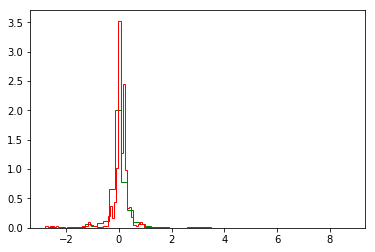

In [8]:
import numpy;

# PDF of train and test 'y' values. 
import matplotlib.pyplot as plt 
plt.hist(train_y, bins=50, normed=1, color='green', histtype ='step');
plt.hist(test_y, bins=50, normed=1, color='red', histtype ='step');
plt.show()




In [10]:
#Model 0: Base line Model: y_test_pred = mean(y_train_i) 
train_mean_y = np.mean(train_y)

print('Test_MSE(MEAN):%f' % np.mean(np.square(test_y-train_mean_y)) )

print('Test_MSE(ZERO):%f' % np.mean(np.square(test_y-0.0)) )


Test_MSE(MEAN):0.191127
Test_MSE(ZERO):0.190891


In [8]:
import tensorflow as tf
import scipy.misc
import model
import cv2
from subprocess import call

sess = tf.InteractiveSession()
saver = tf.train.Saver()
saver.restore(sess, "save/model.ckpt")

img = cv2.imread('steering_wheel_image.jpg',0)
rows,cols = img.shape

smoothed_angle = 0

cap = cv2.VideoCapture(0)
while(cv2.waitKey(10) != ord('q')):
    ret, frame = cap.read()
    image = scipy.misc.imresize(frame, [66, 200]) / 255.0
    degrees = model.y.eval(feed_dict={model.x: [image], model.keep_prob: 1.0})[0][0] * 180 / scipy.pi
    call("clear")
    print("Predicted steering angle: " + str(degrees) + " degrees")
    cv2.imshow('frame', frame)
    #make smooth angle transitions by turning the steering wheel based on the difference of the current angle
    #and the predicted angle
    smoothed_angle += 0.2 * pow(abs((degrees - smoothed_angle)), 2.0 / 3.0) * (degrees - smoothed_angle) / abs(degrees - smoothed_angle)
    M = cv2.getRotationMatrix2D((cols/2,rows/2),-smoothed_angle,1)
    dst = cv2.warpAffine(img,M,(cols,rows))
    cv2.imshow("steering wheel", dst)

cap.release()
cv2.destroyAllWindows()


INFO:tensorflow:Restoring parameters from save/model.ckpt


NotFoundError: Restoring from checkpoint failed. This is most likely due to a Variable name or other graph key that is missing from the checkpoint. Please ensure that you have not altered the graph expected based on the checkpoint. Original error:

Tensor name "Variable_20" not found in checkpoint files save/model.ckpt
	 [[Node: save/RestoreV2 = RestoreV2[dtypes=[DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, ..., DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT], _device="/job:localhost/replica:0/task:0/device:CPU:0"](_arg_save/Const_0_0, save/RestoreV2/tensor_names, save/RestoreV2/shape_and_slices)]]
	 [[Node: save/RestoreV2/_7 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device_incarnation=1, tensor_name="edge_12_save/RestoreV2", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:GPU:0"]()]]

Caused by op 'save/RestoreV2', defined at:
  File "D:\installed\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "D:\installed\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "D:\installed\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "D:\installed\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "D:\installed\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "D:\installed\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 127, in start
    self.asyncio_loop.run_forever()
  File "D:\installed\Anaconda3\lib\asyncio\base_events.py", line 422, in run_forever
    self._run_once()
  File "D:\installed\Anaconda3\lib\asyncio\base_events.py", line 1432, in _run_once
    handle._run()
  File "D:\installed\Anaconda3\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "D:\installed\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 117, in _handle_events
    handler_func(fileobj, events)
  File "D:\installed\Anaconda3\lib\site-packages\tornado\stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "D:\installed\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "D:\installed\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "D:\installed\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "D:\installed\Anaconda3\lib\site-packages\tornado\stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "D:\installed\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "D:\installed\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "D:\installed\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "D:\installed\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "D:\installed\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "D:\installed\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "D:\installed\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "D:\installed\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2903, in run_ast_nodes
    if self.run_code(code, result):
  File "D:\installed\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-034a423fdeae>", line 8, in <module>
    saver = tf.train.Saver()
  File "D:\installed\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 1281, in __init__
    self.build()
  File "D:\installed\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 1293, in build
    self._build(self._filename, build_save=True, build_restore=True)
  File "D:\installed\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 1330, in _build
    build_save=build_save, build_restore=build_restore)
  File "D:\installed\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 778, in _build_internal
    restore_sequentially, reshape)
  File "D:\installed\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 397, in _AddRestoreOps
    restore_sequentially)
  File "D:\installed\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 829, in bulk_restore
    return io_ops.restore_v2(filename_tensor, names, slices, dtypes)
  File "D:\installed\Anaconda3\lib\site-packages\tensorflow\python\ops\gen_io_ops.py", line 1463, in restore_v2
    shape_and_slices=shape_and_slices, dtypes=dtypes, name=name)
  File "D:\installed\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "D:\installed\Anaconda3\lib\site-packages\tensorflow\python\util\deprecation.py", line 454, in new_func
    return func(*args, **kwargs)
  File "D:\installed\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 3155, in create_op
    op_def=op_def)
  File "D:\installed\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1717, in __init__
    self._traceback = tf_stack.extract_stack()

NotFoundError (see above for traceback): Restoring from checkpoint failed. This is most likely due to a Variable name or other graph key that is missing from the checkpoint. Please ensure that you have not altered the graph expected based on the checkpoint. Original error:

Tensor name "Variable_20" not found in checkpoint files save/model.ckpt
	 [[Node: save/RestoreV2 = RestoreV2[dtypes=[DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, ..., DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT], _device="/job:localhost/replica:0/task:0/device:CPU:0"](_arg_save/Const_0_0, save/RestoreV2/tensor_names, save/RestoreV2/shape_and_slices)]]
	 [[Node: save/RestoreV2/_7 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device_incarnation=1, tensor_name="edge_12_save/RestoreV2", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:GPU:0"]()]]
